In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [108]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [109]:
train_df.head()

# identifier: 'sessionID', 'userID'

# continous: 'TARGET'(dependent), 'quality', 'duration', 'transaction', 'transaction_revenue'

# category: 'browser', 'OS', 'device', 'country','continent', 'subcontinent', 'traffic_source', 'traffic_medium', 'keyword', 'referral_path'
# binary: 'new','bounced'

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


# Pre-processing

In [110]:
# drop columns with missing values: 'referral_path','keyword'
x_train =  train_df.drop(['TARGET'], axis=1)
y_train = train_df['TARGET']


## Grouping: traffic_source

In [111]:
cols = ['google', 'youtube', 'baidu', 'facebook', 'yahoo', 'bing', 'quora', 'quiita', 'Partners', 'reddit']

# test
for col in cols:
    x_train.loc[x_train['traffic_source'].str.contains(col), 'traffic_source'] = col

# train 
for col in cols:
    test_df.loc[test_df['traffic_source'].str.contains(col), 'traffic_source'] = col

In [112]:
counts = x_train['traffic_source'].value_counts()
for value, count in counts.items():
    print(f"{value}: {count}")

google: 129283
(direct): 59026
youtube: 52876
Partners: 5369
facebook: 747
bing: 704
reddit: 683
qiita.com: 548
quora: 503
baidu: 474
dfa: 436
away.vk.com: 379
yahoo: 301
blog.golang.org: 186
dealspotr.com: 93
lunametrics.com: 81
duckduckgo.com: 75
t.co: 64
linkedin.com: 45
sashihara.jp: 44
int.search.tb.ask.com: 39
aulagrado.esic.edu: 36
outlook.live.com: 31
online-metrics.com: 26
ask: 25
pinterest.com: 21
l.messenger.com: 17
phandroid.com: 17
learn.pct.edu: 16
msn.com: 15
myasucourses.asu.edu: 11
vk.com: 11
arstechnica.com: 8
github.com: 7
r.search.aol.com: 7
bluequill.franklin.edu: 6
s0.2mdn.net: 6
gophergala.com: 6
search.xfinity.com: 5
evernote.com: 4
web.whatsapp.com: 4
search.tb.ask.com: 3
startpage.com: 3
businessinsider.com: 3
search.1and1.com: 3
it.pinterest.com: 3
online.fullsail.edu: 3
learn.colorado.edu: 3
go.mail.ru: 2
wikihow.com: 2
search.mysearch.com: 2
chatwork.com: 2
blackboard.bentley.edu: 2
kik.com: 2
getpocket.com: 2
lisham-web.blogspot.com: 1
search.snapdo.com: 1

## New Category: 'others'

In [113]:
cols = ['browser', 'OS', 'subcontinent', 'traffic_source']

threshold = 100

for col in cols:
    x_train[col] = x_train[col].where(x_train[col].map(x_train[col].value_counts()) >= threshold, 'others')
    
for col in cols:
    test_df[col] = test_df[col].where(test_df[col].map(test_df[col].value_counts()) >= threshold, 'others')

## keyword 및 refferal_path 처리

In [114]:
import re

def extract_category(keyword):
    if isinstance(keyword, str):
        match = re.search(r'Category\d+', keyword)
        if match:
            return match.group(0)
    return keyword

x_train['keyword'] = x_train['keyword'].apply(extract_category)
x_train['keyword'] = x_train['keyword'].fillna('others')
x_train['keyword'].unique()

test_df['keyword'] = test_df['keyword'].apply(extract_category)
test_df['keyword'] = test_df['keyword'].fillna('others')

In [115]:
x_train['referral_path'] = x_train['referral_path'].apply(extract_category)
x_train['referral_path'] = x_train['referral_path'].fillna('Others')
x_train['referral_path'].unique()

array(['Others', 'Category6', 'Category7', 'Category5', 'Category11',
       'Category8', 'Category9', 'Category13', 'Category1', 'Category2',
       'Category3', 'Category4', 'Category12', 'Category10'], dtype=object)

In [116]:
test_df['referral_path'] = test_df['referral_path'].apply(extract_category)
test_df['referral_path'] = test_df['referral_path'].fillna('Others')
test_df['referral_path'].unique()

array(['Category1', 'Others', 'Category2', 'Category11', 'Category3',
       'Category10', 'Category6', 'Category8', 'Category5', 'Category12',
       'Category13', 'Category7', 'Category9', 'Category4'], dtype=object)

In [117]:
test_df.head()

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),others,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,Others
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube,referral,others,Category2
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,Others
4,SESSION_252293,USER_206028,Internet Explorer,others,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube,referral,others,Category11


## Encoding

In [118]:
# oneHotEncoder vs binaryEncoder

from sklearn.preprocessing import OneHotEncoder  

categories = ['browser', 'OS', 'device', 'country','continent', 'subcontinent', 'traffic_source', 'traffic_medium', 'referral_path', 'keyword']

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')   # drop = 'first'

train_encoded_df = pd.DataFrame(encoder.fit_transform(x_train[categories]) , columns=encoder.get_feature_names_out(categories))
display(train_encoded_df.head())

try :
    test_encoded_df = pd.DataFrame(encoder.transform(test_df[categories]), columns=encoder.get_feature_names_out(categories))
    display(test_encoded_df.head())

except Exception as e:
    print(f"Error : {e}")

C:\Users\taeho\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category12,keyword_Category2,keyword_Category3,keyword_Category4,keyword_Category5,keyword_Category6,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category12,keyword_Category2,keyword_Category3,keyword_Category4,keyword_Category5,keyword_Category6,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## z-score normalization

In [119]:
from sklearn.preprocessing import StandardScaler

continuous_col = ['quality', 'duration', 'transaction', 'transaction_revenue']

# train
scaler = StandardScaler()
train_scaled_df = pd.DataFrame(scaler.fit_transform(x_train[continuous_col]), index=x_train.index, columns=continuous_col)
display(train_scaled_df.head())

# test
test_scaled_df = pd.DataFrame(scaler.transform(test_df[continuous_col]), index=test_df.index, columns=continuous_col)
display(test_scaled_df.head())

,quality,duration,transaction,transaction_revenue
0,3.713206,2.193865,-0.089494,-0.042587
1,-0.253972,-0.223964,-0.089494,-0.042587
2,-0.253972,-0.341833,-0.089494,-0.042587
3,-0.253972,-0.341833,-0.089494,-0.042587
4,-0.253972,-0.341833,-0.089494,-0.042587


,quality,duration,transaction,transaction_revenue
0,6.418101,1.767722,-0.089494,-0.042587
1,-0.253972,-0.341833,-0.089494,-0.042587
2,-0.253972,-0.242098,-0.089494,-0.042587
3,-0.253972,-0.112140,-0.089494,-0.042587
4,-0.163809,0.782457,-0.089494,-0.042587


## Final Dataset

In [120]:
# merge all selected columns
x_train_fin = pd.concat([train_encoded_df, train_scaled_df,  train_df[['bounced', 'new']]], axis=1)
display(x_train_fin.head())

x_test_fin = pd.concat([test_encoded_df, test_scaled_df,  test_df[['bounced', 'new']]], axis=1)
display(x_test_fin.head())

,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others,quality,duration,transaction,transaction_revenue,bounced,new
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.713206,2.193865,-0.089494,-0.042587,0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.223964,-0.089494,-0.042587,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,0


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others,quality,duration,transaction,transaction_revenue,bounced,new
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.418101,1.767722,-0.089494,-0.042587,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.341833,-0.089494,-0.042587,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.242098,-0.089494,-0.042587,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.112140,-0.089494,-0.042587,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.163809,0.782457,-0.089494,-0.042587,0,1


In [121]:
# 비율 및 비율 변환
x_train_fin['avg_transaction_revenue'] = x_train_fin['transaction_revenue'] / x_train_fin['transaction']
x_test_fin['avg_transaction_revenue'] = x_test_fin['transaction_revenue'] / x_test_fin['transaction']

# 합산 및 차분
x_train_fin['total_engagement'] = x_train_fin['quality'] + x_train_fin['duration'] + x_train_fin['transaction']
x_test_fin['total_engagement'] = x_test_fin['quality'] + x_test_fin['duration'] + x_test_fin['transaction']

# 상호작용 및 다항식 생성
x_train_fin['quality_duration_interaction'] = x_train_fin['quality'] * x_train_fin['duration']
x_test_fin['quality_duration_interaction'] = x_test_fin['quality'] * x_test_fin['duration']

# 추가 변수 생성
x_train_fin['quality_div_duration'] = x_train_fin['quality'] / x_train_fin['duration']
x_test_fin['quality_div_duration'] = x_test_fin['quality'] / x_test_fin['duration']

x_train_fin['quality_squared'] = x_train_fin['quality'] ** 2
x_test_fin['quality_squared'] = x_test_fin['quality'] ** 2

x_train_fin['duration_mul_quality'] = x_train_fin['duration'] * x_train_fin['quality']
x_test_fin['duration_mul_quality'] = x_test_fin['duration'] * x_test_fin['quality']

# 추가적인 변수 조합
x_train_fin['engagement_div_transaction'] = x_train_fin['total_engagement'] / x_train_fin['transaction']
x_test_fin['engagement_div_transaction'] = x_test_fin['total_engagement'] / x_test_fin['transaction']

x_train_fin['quality_div_transaction'] = x_train_fin['quality'] / x_train_fin['transaction']
x_test_fin['quality_div_transaction'] = x_test_fin['quality'] / x_test_fin['transaction']

# 추가적인 변수 조합
x_train_fin['duration_mul_transaction'] = x_train_fin['duration'] * x_train_fin['transaction']
x_test_fin['duration_mul_transaction'] = x_test_fin['duration'] * x_test_fin['transaction']

x_train_fin['duration_div_quality'] = x_train_fin['duration'] / x_train_fin['quality']
x_test_fin['duration_div_quality'] = x_test_fin['duration'] / x_test_fin['quality']

x_train_fin['quality_mul_transaction'] = x_train_fin['quality'] * x_train_fin['transaction']
x_test_fin['quality_mul_transaction'] = x_test_fin['quality'] * x_test_fin['transaction']

x_train_fin['transaction_div_duration'] = x_train_fin['transaction'] / x_train_fin['duration']
x_test_fin['transaction_div_duration'] = x_test_fin['transaction'] / x_test_fin['duration']


In [123]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x_train_fin, y_train, test_size=0.3, random_state=2024)

# XGBoost 회귀 모델 정의
xgb_model = xgb.XGBRegressor(random_state=2024, n_estimators=100, max_depth=10)  # 모델 파라미터 중 n_estimators와 max_depth만 추가하여 기본값으로 설정

# 모델 학습
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=2024, ...)

In [124]:
# 테스트 세트에 대한 예측 수행
y_pred = xgb_model.predict(x_test_fin)

In [125]:
y_pred

array([29.584793 ,  0.9981265,  3.1348429, ...,  2.5488539,  4.6918583,
        1.0032791], dtype=float32)

In [126]:
submit = pd.read_csv("sample_submission.csv")

In [127]:
submit['TARGET'] =y_pred
submit

,sessionID,TARGET
0,SESSION_252289,29.584793
1,SESSION_252290,0.998127
2,SESSION_252291,3.134843
3,SESSION_252292,4.316323
4,SESSION_252293,9.067224
...,...,...
79781,SESSION_332070,0.996554
79782,SESSION_332071,0.995833
79783,SESSION_332072,2.548854
79784,SESSION_332073,4.691858


In [128]:
submit.to_csv('xgboost14.csv', index=False)

## PCA

Text(0, 0.5, 'Explained variance (%)')

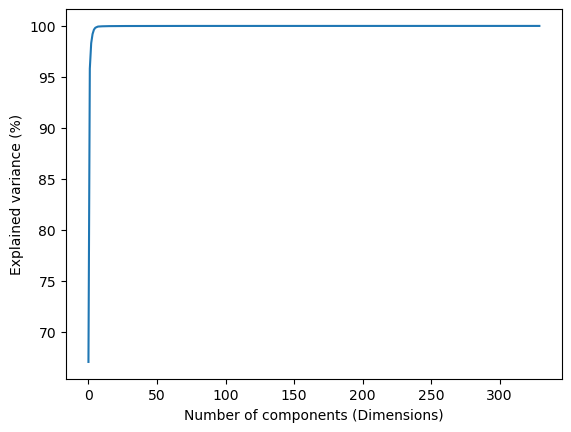

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None, random_state=375)

pca.fit(x_train_fin)

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [106]:
missing_values_count = x_train_fin.isnull().sum()
missing_variables = missing_values_count[missing_values_count > 0].index.tolist()
print("Variables with missing values:", missing_variables)


Variables with missing values: ['transaction_sqrt']
